In [1]:
import pandas as pd

from utils import load_parquet_to_df_list, z_normalize


# load time series dataset into dataframe and z-normalize it
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)


# only select columns with data ('signal') and ignore class labels ('pattern_main_id')
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1).iloc[:, :2]
df_norm

,signal,signal
0,1.530741,2.223633
1,1.544163,2.058567
2,1.416333,1.849589
3,1.249289,1.642328
4,1.043554,1.438219
...,...,...
123,0.744584,1.345195
124,0.958963,1.547908
125,1.101069,1.760490
126,1.330517,1.970141


### SAX variants

In [2]:
from approximation.paa import PAA
from discretization.sax.sax import SAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.persist.persist import Persist


alphabet_size = 9
alphabet_size_slope = 3

sax = SAX(alphabet_size)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size_avg=alphabet_size, alphabet_size_slope=alphabet_size_slope)
persist = Persist(alphabet_size)

sax_variant = sax

### Compression Ratio

calculated as: #bits for symbolic representation / #bits for original time series

assumptions: 64 bits per time series point (floating-point number double precision); ceil(log2(size of alphabet)) bits per symbol

### Analysis for different alphabet sizes

In [3]:
from collections import defaultdict
import math


num_segments = round(df_norm.shape[0] / 8)
alphabet_sizes = [4, 9, 16, 25]

compression = defaultdict(list)
for alphabet_size in alphabet_sizes:
    sax_variants = []
    sax = SAX(alphabet_size)
    a_sax = AdaptiveSAX(alphabet_size)
    one_d_sax = OneDSAX(alphabet_size, alphabet_size)
    e_sax = ExtendedSAX(alphabet_size)
    persist = Persist(alphabet_size)
    sax_variants.extend([sax, a_sax, one_d_sax, e_sax, persist])
    lst = []
    for sax_variant in sax_variants:
        compression[sax_variant.name].append(sax_variant.compute_compression_ratio_percentage(df_norm.shape[0], num_segments))

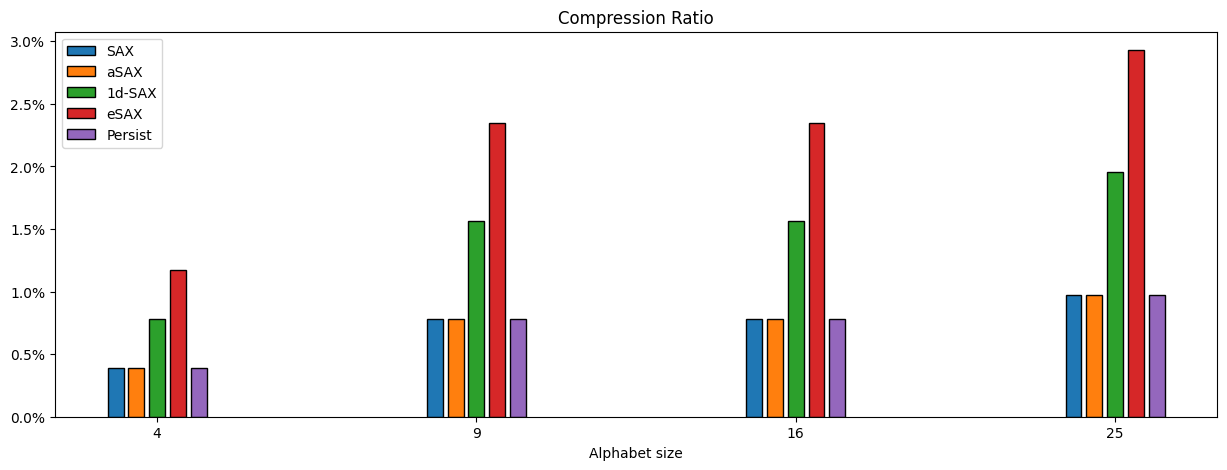

In [4]:
from discretization.sax.graphics import plot_compression_ratio_comparison


plot_compression_ratio_comparison(compression, alphabet_sizes)